
## Brain Atlases
A brain atlas is a labeling of a volume. Each voxel contains a label, instead of a gray value. These labels are numeric. Each number corresponds to a region of interest (ROI).

Why ROIs?

1. Explore the data (see signal in areas of interest plotted for each condition or plotted against other variables of interest)
2. Limit number of statistical tests, controlling for Type I error
3. Limit statistical tests to a region that is functionally defined.

Some of these atlases are also explained here: https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Atlases.

##  Comparing Atlases
A full list of nilearn atlases can be found here: http://nilearn.github.io/modules/reference.html#module-nilearn.datasets.
For questions about which brain atlas to use, a recent Arslan et al., 2018 paper may aid in your search.

## Retrieving the Atlas
For this tutorial, we'll be using a set of parcellations from [Yeo et al., 2011](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3174820/). This atlas was generated from fMRI data from 1000 healthy control participants.

In [14]:
import numpy as np
import nibabel as nib
from nilearn import datasets
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt
%matplotlib inline

First let's get the Yeo 2011 atlas

In [15]:
parcel_dir = '../resources/rois/' 
atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011(parcel_dir)

If we look at the dictionary keys for `atlas_yeo_2011`, we can see that the Yeo atlas actually contains 4 different ROI atlases.

In [16]:
atlas_yeo_2011.keys()

dict_keys(['description', 'thin_7', 'thick_7', 'thin_17', 'thick_17', 'colors_7', 'colors_17', 'anat'])

Let's plot each of them to see what they look like. You'll notice that the colour bar on the right shows the number of labels in each atlas and which colour corresponds to which network

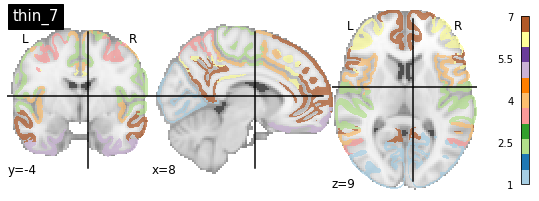

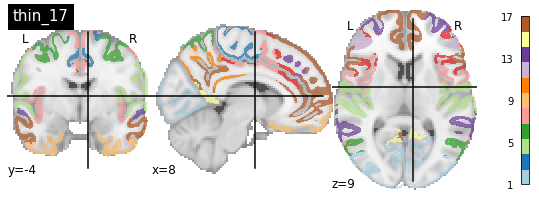

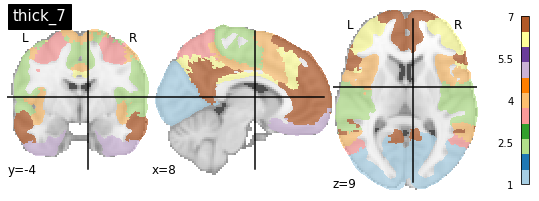

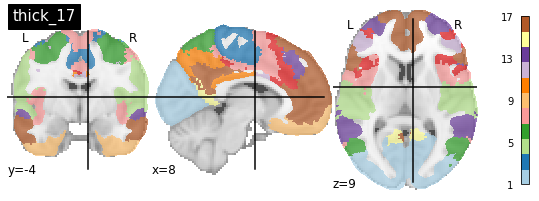

In [17]:
cut_coords = (8, -4 ,9)
colorbar=True
cmap = 'Paired'

plotting.plot_roi(atlas_yeo_2011['thin_7'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thin_7')
plotting.plot_roi(atlas_yeo_2011['thin_17'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thin_17')
plotting.plot_roi(atlas_yeo_2011['thick_7'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thick_7')
plotting.plot_roi(atlas_yeo_2011['thick_17'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thick_17')

We'll choose the 7 network atlas. The 7 networks you see include: Background, Visual, Somatosensory, Dorsal Attension, Ventral Attention, Limbic, Frontoparietal, and Default.

In [18]:
atlas_yeo = atlas_yeo_2011.thick_7

### Relabeling the atlas into separate ROIs
Often, in a given atlas of labels, the same label may be used in different connection regions (eg. a region in each hemisphere). If we want to perform our analysis on regions and not networks, we need to assign a different label to each connected region. We'll use nilearn's connected_label_regions() function to split up the 7 networks of the Yeo atlas into 49 ROIs.

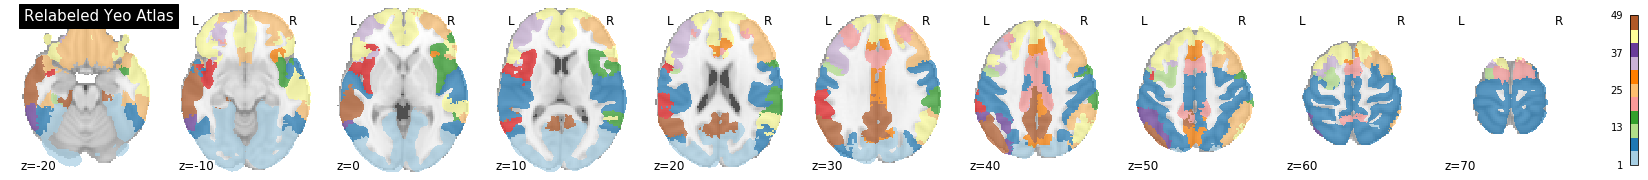

In [19]:
from nilearn.regions import connected_label_regions
region_labels = connected_label_regions(atlas_yeo)
plotting.plot_roi(region_labels,
                  cut_coords=(-20, -10, 0, 10, 20, 30, 40, 50, 60, 70),
                  display_mode='z',
                  colorbar=True,
                  cmap='Paired',
                  title='Relabeled Yeo Atlas')

### Resampling the atlas
Let's save the new atlas to a NIfTI file so that we can work with it later.

In [20]:
region_labels.to_filename('../resources/rois/yeo_2011/Yeo_JNeurophysiol11_MNI152/relabeled_yeo_atlas.nii.gz')

In order to apply the atlas to our fMRI image, we first need to make sure that they have the same dimensions.

In [21]:
func_file = '../data/ds000030/derivatives/fmriprep/sub-10788/func/sub-10788_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'
func_img = nib.load(func_file)

<div class=exercise>
    <b>EXERCISE:</b> What are the dimensions of func_img and region_labels? If they aren't equal, resample the atlas. </div>

<div class=solution> 
  <b>SOLUTION:</b>
</div>

In [22]:
print("fmri image dimensions:", func_img.shape)
print("atlas dimensions:", region_labels.shape)

fmri image dimensions: (65, 77, 49, 152)
atlas dimensions: (256, 256, 256)


In [23]:
resampled_yeo = image.resample_to_img(region_labels, func_img, interpolation = 'nearest')

Let's see what the resampled atlas looks like overlayed on a slice of our NifTI file

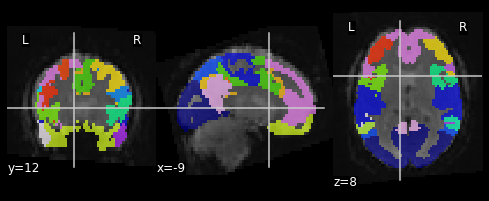

In [24]:
plotting.plot_roi(resampled_yeo, func_img.slicer[:, :, :, 54])

### Visualizing ROIs

<div class=exercise> 
    <b>EXERCISE:</b> Visualize ROIs 44 and 46 in the Yeo atlas. We'll be looking at these 2 ROIs in more detail during our analysis
</div>

<div class=solution> 
  <b>SOLUTION:</b>
</div>

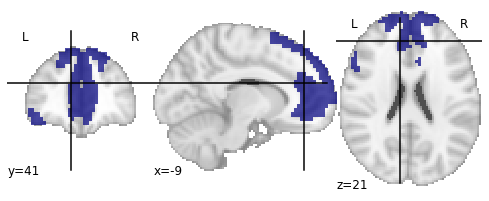

In [25]:
from nilearn import image

roi = 44
roi_mask = image.math_img('a == {}'.format(roi), a=resampled_yeo) 
masked_resamp_yeo = image.math_img('a*b',a=resampled_yeo,b=roi_mask) 
plotting.plot_roi(masked_resamp_yeo)

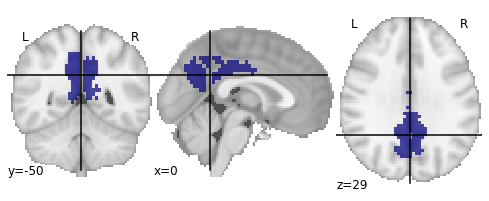

In [26]:
roi = 46
roi_mask = image.math_img('a == {}'.format(roi), a=resampled_yeo) 
masked_resamp_yeo = image.math_img('a*b',a=resampled_yeo,b=roi_mask) 
plotting.plot_roi(masked_resamp_yeo)